<p style="font-family: Arial; font-size:3.5em;color:green; font-style:bold"><br>
BCIS 5110 Exam 2</p><br>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We will analyze a dataset about the life quality of Asian Americans based on a survey.<br>
Asian Americans are the fastest-growing minority group in the United States. Currently, Asian Americans make up 5.6% of the total U.S. population. We need a better understanding of the social and health needs of the Asian American population. The survey collects information from Asian American respondents about many aspects of them and how they perceive about the quality of their life.<br>
The dataset has a lot of variables. We will understand them step by step.

1. Import packages and the dataset

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
import pandas as pd

uploaded = files.upload()
aaqol_data = pd.read_csv(list(uploaded.keys())[0])

Saving AAQoL.csv to AAQoL (4).csv


2. Check for basic information. What data types are the variables? Try to understand them. They fall in the following aspects: basic demographics, feelings of belonging, health and healthcare, support networks, etc.<br>
Any missing values? Find the top 10 variables with most missing values.

In [ ]:
aaqol_data.info()
data_types = aaqol_data.dtypes

missing_values = aaqol_data.isnull().sum().sort_values(ascending=False)

# Identifying top 10 variables with the most missing values
top_missing = missing_values.head(10)

data_types, missing_values, top_missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Survey ID                       2609 non-null   int64  
 1   Age                             2600 non-null   float64
 2   Gender                          2582 non-null   object 
 3   Ethnicity                       2607 non-null   object 
 4   Marital Status                  2591 non-null   object 
 5   Education Completed             2572 non-null   float64
 6   Household Size                  2592 non-null   float64
 7   No One                          2604 non-null   object 
 8   Spouse                          2604 non-null   object 
 9   Children                        2604 non-null   object 
 10  Grand Children                  2604 non-null   object 
 11  Parent                          2604 non-null   object 
 12  Grandparent                     25

(Survey ID                int64
 Age                    float64
 Gender                  object
 Ethnicity               object
 Marital Status          object
                         ...   
 Online Communities      object
 Health Website          object
 Other                  float64
 Quality of Life        float64
 Satisfied With Life     object
 Length: 72, dtype: object,
 Occupation             795
 Religion               528
 Income                 203
 Achieving Ends Meet    159
 Folkmedicine            72
                       ... 
 Parent                   5
 Brother/Sister           5
 Language                 2
 Ethnicity                2
 Survey ID                0
 Length: 72, dtype: int64,
 Occupation             795
 Religion               528
 Income                 203
 Achieving Ends Meet    159
 Folkmedicine            72
 Preferance              63
 Urgentcare              57
 Other Relative          57
 Belonging               51
 Satisfied With Life     50
 dtyp

The variables are of dtypes: int64, float64, object. Yes there are missing values and the top most variable with most missing values is "ocupation".

How many observations with missing values? The number suggests that we need to work on it.

In [ ]:
observations_with_missing = aaqol_data.isnull().any(axis=1).sum()
print(f"Number of observations with missing values: {observations_with_missing}")

Number of observations with missing values: 1505


How many observations miss more than 10 values? Show them.

In [ ]:
observations_missing_more_than_10 = aaqol_data[aaqol_data.isnull().sum(axis=1) > 10]

# Count the number of such observations
count_missing_more_than_10 = observations_missing_more_than_10.shape[0]

# Print the count and display the rows
print(f"Number of observations missing more than 10 values: {count_missing_more_than_10}")
print(f"Observations missing more than 10 values: {observations_missing_more_than_10}")

Number of observations missing more than 10 values: 30
Observations missing more than 10 values:       Survey ID   Age  Gender     Ethnicity         Marital Status  \
0         80314   NaN     NaN    Vietnamese                    NaN   
1         60171  60.0    Male       Chinese                Married   
4         10494  29.0    Male  Asian Indian                 Single   
5         10786  34.0  Female  Asian Indian                Married   
7         10858  47.0    Male  Asian Indian                Married   
17     10040055  68.0  Female      Filipino                Married   
19        30052   NaN     NaN           NaN                    NaN   
20        80438   NaN     NaN           NaN                    NaN   
22        60100  72.0  Female       Chinese                Married   
41        50011  75.0  Female       Chinese                Married   
374       60151  72.0    Male       Chinese                Married   
433       50027  56.0  Female       Chinese                Marr

3. We will work on the missing values later. Let's explore the data first. Make a graph to show the distribution of Ethnicity. Which is the largest ethnic group in the survey?

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Ethnicity'>

Text(0.5, 1.0, 'Distribution of Ethnicity')

Text(0.5, 0, 'Ethnicity')

Text(0, 0.5, 'Number of Respondents')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Chinese'),
  Text(1, 0, 'Asian Indian'),
  Text(2, 0, 'Vietnamese'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Filipino'),
  Text(5, 0, 'Other')])

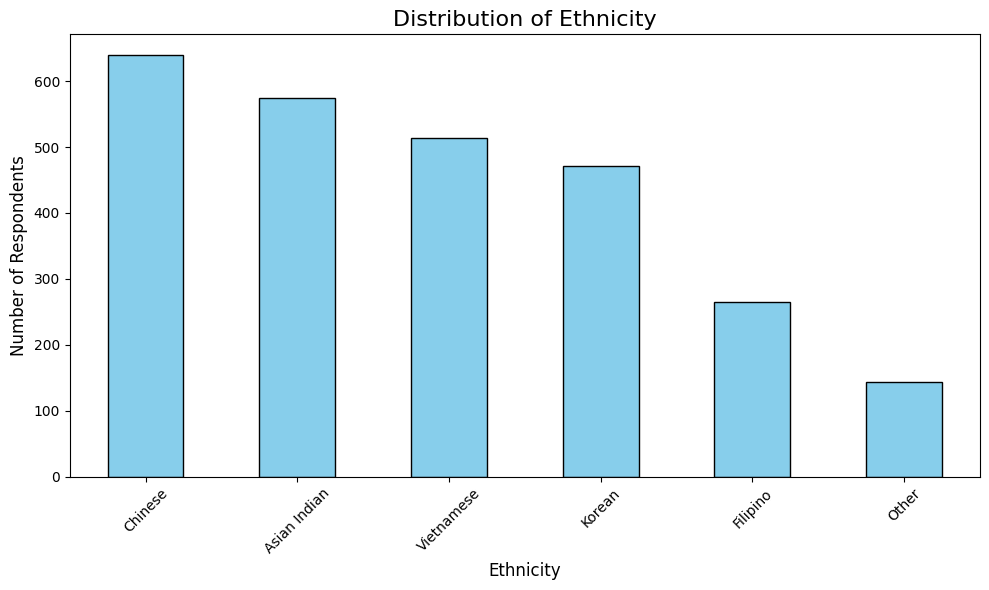

The largest ethnic group is 'Chinese' with 639 respondents.


In [ ]:
import matplotlib.pyplot as plt

ethnicity_counts = aaqol_data['Ethnicity'].value_counts()

plt.figure(figsize=(10, 6))
ethnicity_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

largest_ethnic_group = ethnicity_counts.idxmax()
largest_count = ethnicity_counts.max()
print(f"The largest ethnic group is '{largest_ethnic_group}' with {largest_count} respondents.")

The largest ethnic group is 'Chinese' with 639 respondents.

Make a graph to show the average quality of life score for each ethnicity group. Which group has the highest score for quality of life?

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Ethnicity'>

Text(0.5, 1.0, 'Average Quality of Life Score by Ethnicity')

Text(0.5, 0, 'Ethnicity')

Text(0, 0.5, 'Average Quality of Life Score')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Filipino'),
  Text(1, 0, 'Asian Indian'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Vietnamese'),
  Text(5, 0, 'Chinese')])

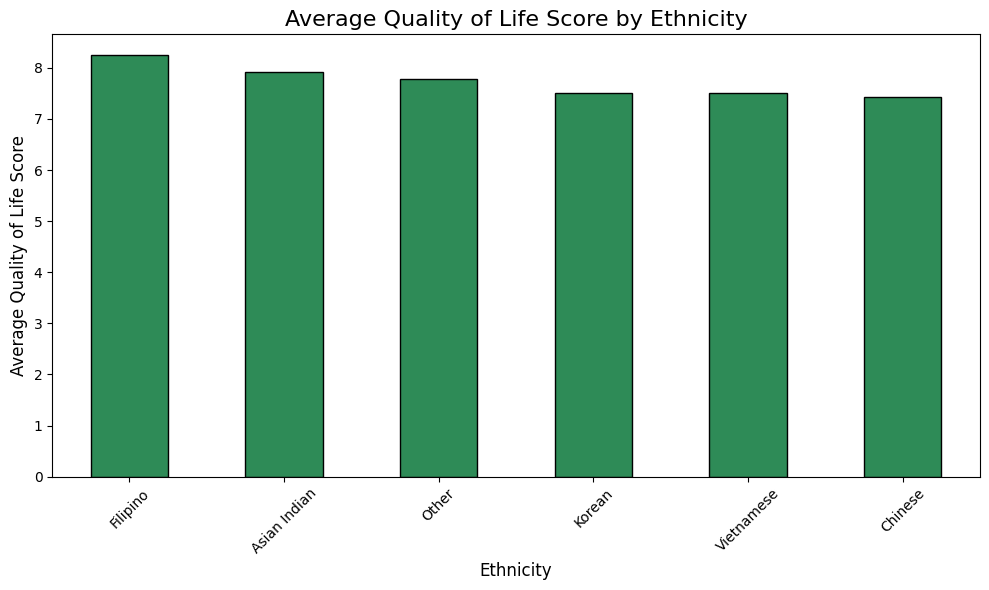

The ethnic group with the highest average quality of life score is 'Filipino' with a score of 8.24.


In [ ]:
import matplotlib.pyplot as plt

average_quality_of_life = aaqol_data.groupby('Ethnicity')['Quality of Life'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_quality_of_life.plot(kind='bar', color='seagreen', edgecolor='black')
plt.title('Average Quality of Life Score by Ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Average Quality of Life Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

highest_quality_group = average_quality_of_life.idxmax()
highest_quality_score = average_quality_of_life.max()
print(f"The ethnic group with the highest average quality of life score is '{highest_quality_group}' with a score of {highest_quality_score:.2f}.")

The ethnic group with the highest average quality of life score is 'Filipino' with a score of 8.24.

Make a similar graph to show average education completed each ethnicity group. Which group has the highest years of education completed?

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Ethnicity'>

Text(0.5, 1.0, 'Average Education Completed by Ethnicity')

Text(0.5, 0, 'Ethnicity')

Text(0, 0.5, 'Average Years of Education Completed')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asian Indian'),
  Text(1, 0, 'Chinese'),
  Text(2, 0, 'Korean'),
  Text(3, 0, 'Filipino'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Vietnamese')])

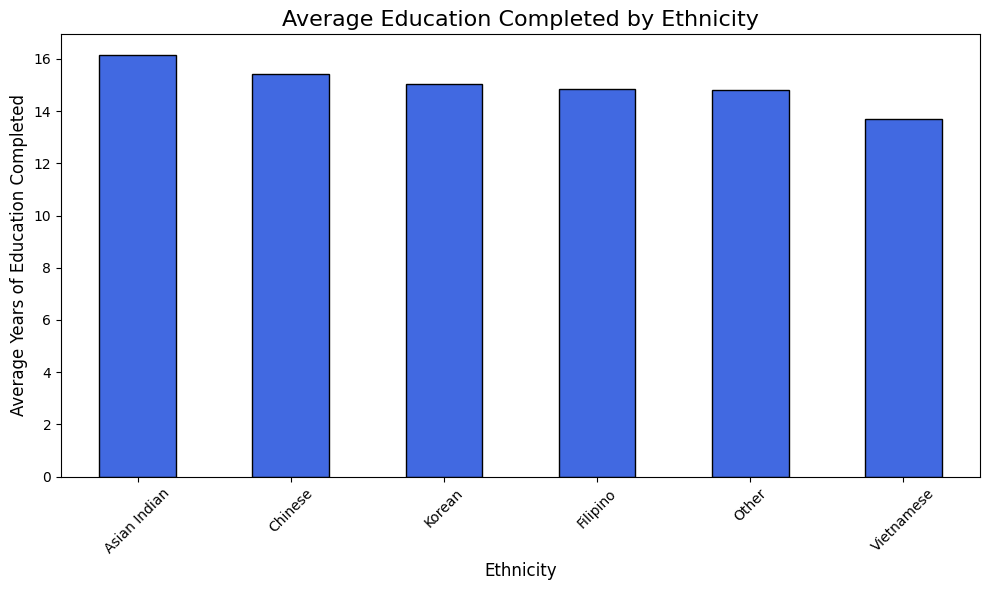

The ethnic group with the highest average years of education completed is 'Asian Indian' with 16.13 years.


In [ ]:
import matplotlib.pyplot as plt

average_education_completed = aaqol_data.groupby('Ethnicity')['Education Completed'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_education_completed.plot(kind='bar', color='royalblue', edgecolor='black')
plt.title('Average Education Completed by Ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Average Years of Education Completed', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

highest_education_group = average_education_completed.idxmax()
highest_education_score = average_education_completed.max()
print(f"The ethnic group with the highest average years of education completed is '{highest_education_group}' with {highest_education_score:.2f} years.")

The ethnic group with the highest average years of education completed is 'Asian Indian' with 16.13 years.

Make a graph to explore the relationship between 'Education Completed' and 'Quality of Life'. What do you observe?

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Relationship Between Education Completed and Quality of Life')

Text(0.5, 0, 'Education Completed (Years)')

Text(0, 0.5, 'Quality of Life Score')

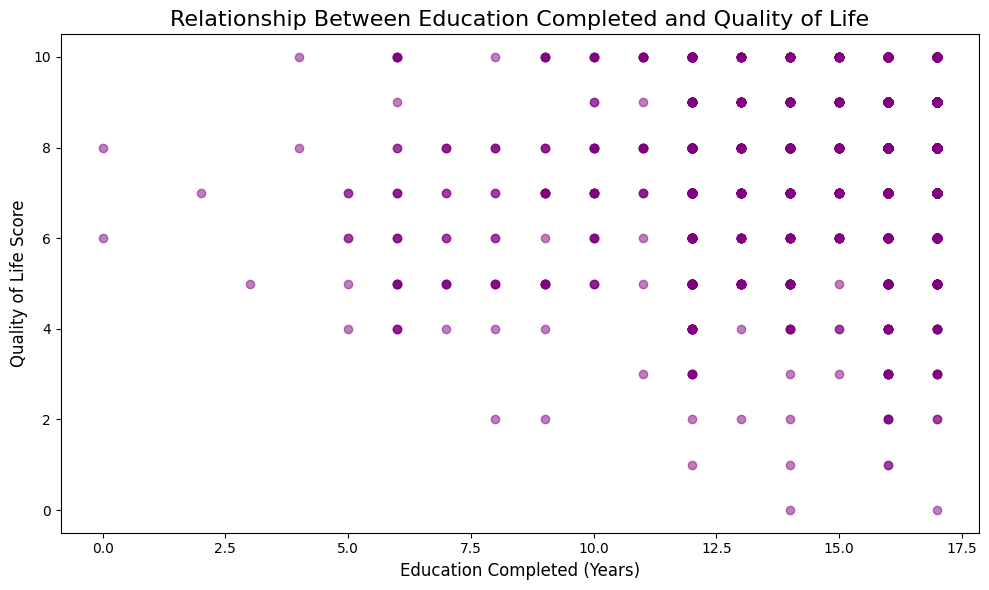

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(aaqol_data['Education Completed'], aaqol_data['Quality of Life'], alpha=0.5, color='purple')
plt.title('Relationship Between Education Completed and Quality of Life', fontsize=16)
plt.xlabel('Education Completed (Years)', fontsize=12)
plt.ylabel('Quality of Life Score', fontsize=12)
plt.tight_layout()
plt.show()

I do observe that the scatter plot is heavily plotted towards the top right of the graph, which indicated the higher the education years completed, the higher is the Quality of life score.

Make a graph to explore the relationship between 'Present Health' and 'Quality of Life'. Think about what graph is more appropriate. What do you observe?

<Figure size 1000x600 with 0 Axes>

<ipython-input-108-51c50f1e5824>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Present Health', y='Quality of Life', data=aaqol_data, palette='Set2')


<Axes: xlabel='Present Health', ylabel='Quality of Life'>

Text(0.5, 1.0, 'Quality of Life Distribution by Present Health')

Text(0.5, 0, 'Present Health')

Text(0, 0.5, 'Quality of Life')

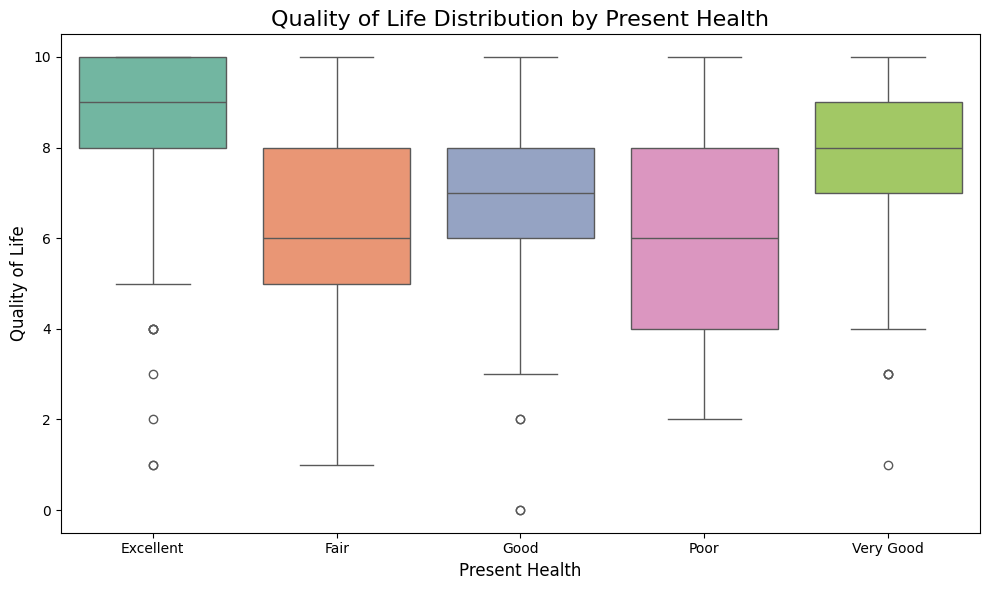

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

aaqol_data['Quality of Life'] = pd.to_numeric(aaqol_data['Quality of Life'], errors='coerce')
aaqol_data['Present Health'] = aaqol_data['Present Health'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Present Health', y='Quality of Life', data=aaqol_data, palette='Set2')

plt.title('Quality of Life Distribution by Present Health', fontsize=16)
plt.xlabel('Present Health', fontsize=12)
plt.ylabel('Quality of Life', fontsize=12)

plt.tight_layout()
plt.show()


I observe that the better the quality of life the better is the present health

Make a pivot table of 'Present Health' and 'Present Mental Health'. What do you observe?

In [ ]:
# Create a pivot table for 'Present Health' and 'Present Mental Health'
pivot_table = pd.pivot_table(aaqol_data, index='Present Health', columns='Present Mental Health', aggfunc='count')

# Display the pivot table
pivot_table


<ipython-input-109-53b68f5c0a22>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(aaqol_data, index='Present Health', columns='Present Mental Health', aggfunc='count')


Achieving Ends Meet                           \
Present Mental Health           Excellent Fair Good Poor Very Good   
Present Health                                                       
Excellent                             417    6   13    3        66   
Fair                                    4  103   62    3        36   
Good                                   54   34  492    6       154   
Poor                                    3   14    6   12         2   
Very Good                             131   17  103    2       696   

                      Acquaintances                           ...  \
Present Mental Health     Excellent Fair Good Poor Very Good  ...   
Present Health                                                ...   
Excellent                       434    6   13    3        71  ...   
Fair                              4  119   68    4        38  ...   
Good                             57   37  526    6       163  ...   
Poor                              3   15    7   13         2  ...   
Very Good                       134   17  111    2       726  ...   

                      Unmet Health Need                          Urgentcare  \
Present Mental Health         Excellent Fair Good Poor Very Good  Excellent   
Present Health                                                                
Excellent                           435    6   14    3        71        428   
Fair                                  4  118   67    4        38          4   
Good                                 57   36  523    6       163         55   
Poor                                  3   14    7   13         2          3   
Very Good                           133   17  112    2       726        133   

                                                
Present Mental Health Fair Good Poor Very Good  
Present Health                                  
Excellent                6   13    3        71  
Fair                   119   67    4        39  
Good                    37  516    6       159  
Poor                    15    7   12         1  
Very Good               17  107    2       718  

[5 rows x 350 columns]

Make a graph to check the distribution of 'Duration of Residency'. What does it tell you?

<Figure size 1000x600 with 0 Axes>

(array([640., 377., 200., 222., 198., 259., 173., 139., 139.,  67.,  98.,
         24.,  18.,   5.,   4.,   1.,   2.,   1.,   0.,   1.]),
 array([ 0.25  ,  4.1375,  8.025 , 11.9125, 15.8   , 19.6875, 23.575 ,
        27.4625, 31.35  , 35.2375, 39.125 , 43.0125, 46.9   , 50.7875,
        54.675 , 58.5625, 62.45  , 66.3375, 70.225 , 74.1125, 78.    ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Duration of Residency')

Text(0.5, 0, 'Duration of Residency (Years)')

Text(0, 0.5, 'Frequency')

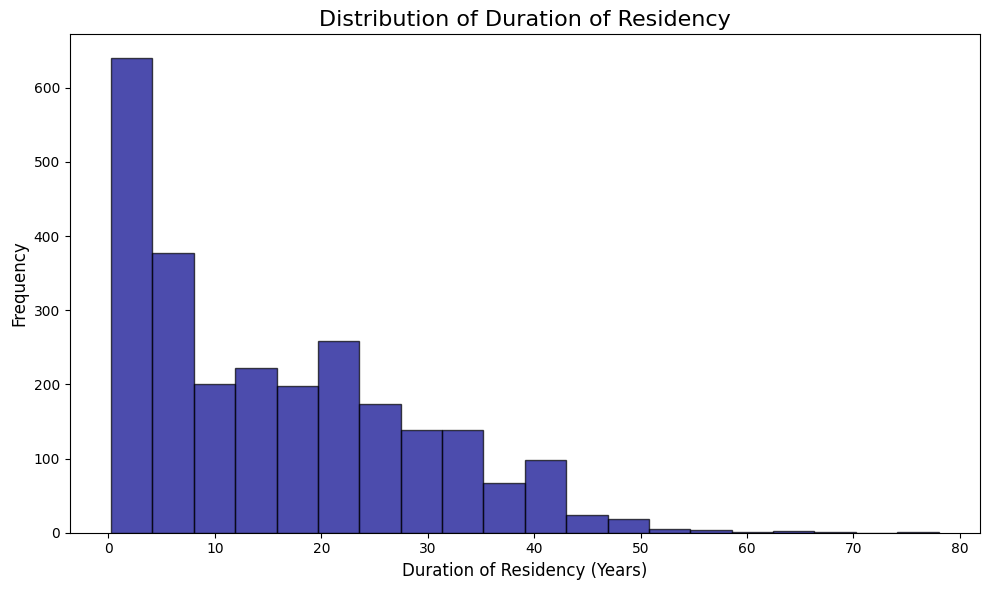

In [ ]:
# Histogram for 'Duration of Residency'
plt.figure(figsize=(10, 6))
plt.hist(aaqol_data['Duration of Residency'], bins=20, color='darkblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Duration of Residency', fontsize=16)
plt.xlabel('Duration of Residency (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


There seem to fewer people with more than 10years of residency. This suggests that majority of the population are relatively new

Make a graph to explore the relationship between "Duration of Residency' and 'Quality of life'. This time treat 'Quality of Life' as a categorical variable. Think about what graph is more appropriate. What do you observe?

<Figure size 1000x600 with 0 Axes>

<ipython-input-111-ef2cdf37ceb7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=aaqol_data['Quality of Life'], y=aaqol_data['Duration of Residency'], palette="Set2")


<Axes: xlabel='Quality of Life', ylabel='Duration of Residency'>

Text(0.5, 1.0, 'Duration of Residency vs Quality of Life')

Text(0.5, 0, 'Quality of Life')

Text(0, 0.5, 'Duration of Residency (Years)')

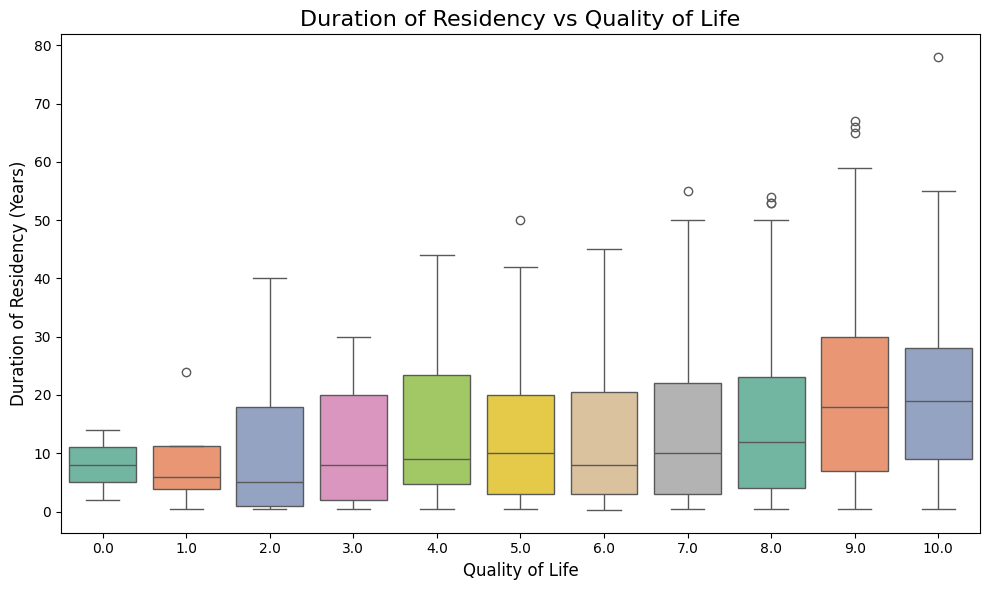

In [ ]:
# Boxplot for 'Duration of Residency' vs 'Quality of Life'
plt.figure(figsize=(10, 6))
sns.boxplot(x=aaqol_data['Quality of Life'], y=aaqol_data['Duration of Residency'], palette="Set2")
plt.title('Duration of Residency vs Quality of Life', fontsize=16)
plt.xlabel('Quality of Life', fontsize=12)
plt.ylabel('Duration of Residency (Years)', fontsize=12)
plt.tight_layout()
plt.show()


The graph seems to be increasing somewhat from left to right. It might indicate that the people who have higher duration of residency is expected to have better quality of life.

Next we examine the support network variables.<br> They are 'Family', 'Close Friend', 'Acquaintances',
       'Heal Professionals', 'Mobile Apps', 'Email', 'Social Networks',
       'Online Communities', 'Health Website', 'Other'. Turn all 'Yes' to 1 and 'No' to 0.<br>
Then create a new variable 'Support' that sums the all variables. For instance, if a person answers 'Yes' to 'Family' and 'Close Friend' and 'No' to all others. The value of 'support' should be 2.

In [ ]:
import pandas as pd

# Assuming the data is already loaded into aaqol_data
# Define the support network columns
support_columns = [
    'Family', 'Close Friend', 'Acquaintances', 'Heal Professionals',
    'Mobile Apps', 'Email', 'Social Networks', 'Online Communities',
    'Health Website', 'Other'
]

# Clean the 'Yes' and 'No' values by stripping extra spaces and converting them to consistent case
aaqol_data[support_columns] = aaqol_data[support_columns].applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# Convert 'Yes' to 1 and 'No' to 0
aaqol_data[support_columns] = aaqol_data[support_columns].applymap(lambda x: 1 if x == 'yes' else 0)

# Create the 'Support' column by summing all the support network columns
aaqol_data['Support'] = aaqol_data[support_columns].sum(axis=1)

# Check the result
print(aaqol_data[['Family', 'Close Friend', 'Acquaintances', 'Heal Professionals', 'Mobile Apps', 'Email',
                  'Social Networks', 'Online Communities', 'Health Website', 'Other', 'Support']].head())


   Family  Close Friend  Acquaintances  Heal Professionals  Mobile Apps  \
0       0             0              0                   0            0   
1       0             0              0                   0            0   
2       1             0              0                   1            0   
3       0             0              0                   1            0   
4       0             0              0                   0            0   

   Email  Social Networks  Online Communities  Health Website  Other  Support  
0      0                0                   0               0      0        0  
1      0                0                   0               0      0        0  
2      0                0                   0               1      0        3  
3      0                0                   0               1      0        2  
4      0                0                   0               0      0        0  


<ipython-input-112-41553606f342>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  aaqol_data[support_columns] = aaqol_data[support_columns].applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
<ipython-input-112-41553606f342>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  aaqol_data[support_columns] = aaqol_data[support_columns].applymap(lambda x: 1 if x == 'yes' else 0)


Then you can make a graph to explore the relationship between 'Support' and 'Quality of Life'. This time treat 'Quality of Life' as a number.

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Relationship Between Support and Quality of Life')

Text(0.5, 0, 'Support Score')

Text(0, 0.5, 'Quality of Life Score')

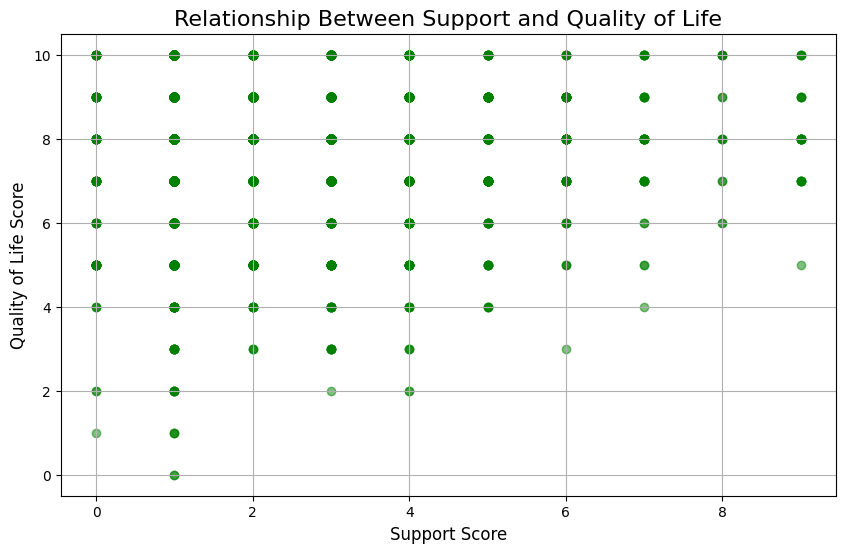

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for 'Support' vs 'Quality of Life'
plt.figure(figsize=(10, 6))
plt.scatter(aaqol_data['Support'], aaqol_data['Quality of Life'], alpha=0.5, color='green')
plt.title('Relationship Between Support and Quality of Life', fontsize=16)
plt.xlabel('Support Score', fontsize=12)
plt.ylabel('Quality of Life Score', fontsize=12)
plt.grid(True)
plt.show()


Now we prepare the data for analysis. First let's take care of the variable with most missing values, 'occupation'.

If you examine carefully, you will find that we can correctly fill in the missing values because the information can be referred from other variables. <br>
If 'Student' is with value 'Student', you should fill in 'Occupation' with 'Student'. Similarly for 'Homeowner' and 'Retired'. <br>
Then check 'Full Time Employment' and 'Part Time Employment'. If both them are 0, you can fill in 'Occupation' with 'None'.

In [ ]:
# Fill missing 'Occupation' based on other columns
aaqol_data['Occupation'] = aaqol_data.apply(
    lambda row: 'Student' if pd.isna(row['Occupation']) and row['Student'] == 'Student' else row['Occupation'], axis=1
)
aaqol_data['Occupation'] = aaqol_data.apply(
    lambda row: 'Homemaker' if pd.isna(row['Occupation']) and row['Homemaker'] == 'Homeowner' else row['Occupation'], axis=1
)
aaqol_data['Occupation'] = aaqol_data.apply(
    lambda row: 'Retired' if pd.isna(row['Occupation']) and row['Retired'] == 'Retired' else row['Occupation'], axis=1
)
aaqol_data['Occupation'] = aaqol_data.apply(
    lambda row: 'None' if pd.isna(row['Occupation']) and row['Full Time Employment'] == 0 and row['Part Time Employment'] == 0 else row['Occupation'], axis=1
)

# Verify if missing values in 'Occupation' are filled
aaqol_data['Occupation'].isna().sum()


328

Once you are done with the imputation above. Check the value counts for the categories. There is an abnormal value 0. Remove the observation.

In [ ]:
# Check the value counts for the 'Occupation' column
occupation_counts = aaqol_data['Occupation'].value_counts()

# Display the value counts
print(occupation_counts)

aaqol_data['Occupation'] = aaqol_data['Occupation'].str.strip()

# Remove rows where 'Occupation' is '0' (abnormal value) using drop
aaqol_data = aaqol_data[aaqol_data['Occupation'] != '0']

# Check the value counts again after removal
occupation_counts_cleaned = aaqol_data['Occupation'].value_counts()

# Display the cleaned value counts
print(occupation_counts_cleaned)


Occupation
Professional                       698
Other                              304
Student                            236
Retired                            231
Manager, executive, or official    191
Service worker                     190
Clerical, office, sales            143
Business owner                     127
Skilled trades                      83
Semi-skilled                        77
0                                    1
Name: count, dtype: int64
Occupation
Professional                       698
Other                              304
Student                            236
Retired                            231
Manager, executive, or official    191
Service worker                     190
Clerical, office, sales            143
Business owner                     127
Skilled trades                      83
Semi-skilled                        77
Name: count, dtype: int64


You can try similar inference for the 'Income' variable. You can try. One step of imputation is enough. You do not need to be as thorough as I do with 'Occupation'.

In [ ]:
# Define a function to map income ranges to average numeric values
def map_income_to_numeric(income):
    if pd.isna(income):
        return np.nan
    if income == '$0 - $9,999':
        return 5000
    elif income == '$10,000 - $19,999':
        return 15000
    elif income == '$20,000 - $29,999':
        return 25000
    elif income == '$30,000 - $39,999':
        return 35000
    elif income == '$40,000 - $49,999':
        return 45000
    elif income == '$50,000 - $59,999':
        return 55000
    elif income == '$60,000 - $69,999':
        return 65000
    elif income == '$70,000 and over':
        return 75000  # or higher, depending on the context
    else:
        return np.nan  # In case there's an unknown value

# Apply the function to convert income categories to numeric values
aaqol_data['Income'] = aaqol_data['Income'].apply(map_income_to_numeric)

# Now fill missing values in 'Income' with the median value
income_median = aaqol_data['Income'].median()

# Replace NaN values with the median income value
aaqol_data['Income'].fillna(income_median, inplace=True)

# Check if any missing values remain in 'Income'
missing_income = aaqol_data['Income'].isnull().sum()

# Display the value counts of 'Income' after imputation
income_counts = aaqol_data['Income'].value_counts()

# Show the result
print(f"Missing values in 'Income' after imputation: {missing_income}")
print(income_counts)


Missing values in 'Income' after imputation: 0
Income
75000.0    992
55000.0    381
5000.0     254
35000.0    207
15000.0    205
25000.0    198
65000.0    190
45000.0    181
Name: count, dtype: int64


<ipython-input-116-c3637654ad38>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aaqol_data['Income'].fillna(income_median, inplace=True)


There is much more to be done to clean the data, but we will stop here. Next let's move on to analysis.

Select at least 8 predictor variables to predict the target variable 'Quality of Life'. Make sure you include 'Occupation' and 'Support' and at least one variable from each aspect (demographics, health, belonging, support network, etc.). Save them to a new data frame.

In [ ]:
# Select at least 8 predictor variables to predict 'Quality of Life'
predictor_variables = [
    'Occupation',          # Occupation as a predictor
    'Support',             # Support as a predictor
    'Age',                 # Age (demographics)
    'Present Health',       # Health status (health)
    'Present Mental Health',       # Mental health (health)
    'Social Networks',# Social connectedness (belonging)
    'Income',              # Income (demographics)
    'Duration of Residency'  # Duration of Residency (demographics)
]

# Create a new DataFrame with the selected predictor variables and the target variable 'Quality of Life'
selected_data = aaqol_data[predictor_variables + ['Quality of Life']]

# Display the first few rows of the selected data
selected_data.head()


,Occupation,Support,Age,Present Health,Present Mental Health,Social Networks,Income,Duration of Residency,Quality of Life
0,NaN,0,NaN,NaN,NaN,0,55000.0,NaN,NaN
1,"Clerical, office, sales",0,60.0,NaN,NaN,0,35000.0,0.5,NaN
2,NaN,3,23.0,Very Good,Good,0,5000.0,11.0,8.0
3,Retired,2,73.0,Good,Very Good,0,55000.0,50.0,NaN
4,Other,0,29.0,Good,Good,0,55000.0,7.0,NaN


*Check* for missing values for the new data frame. Either drop them or fill in with values.

In [ ]:
# Fill missing values in categorical columns with the mode
categorical_columns = ['Occupation', 'Present Health', 'Present Mental Health', 'Social Networks']
for column in categorical_columns:
    mode_value = selected_data[column].mode()[0]
    selected_data[column].fillna(mode_value, inplace=True)

# Fill missing values in numerical columns with the median
numerical_columns = ['Age', 'Income', 'Duration of Residency']
for column in numerical_columns:
    median_value = selected_data[column].median()
    selected_data[column].fillna(median_value, inplace=True)

# Check again for missing values
missing_values_after_fill = selected_data.isnull().sum()

# Display the result after filling
print(missing_values_after_fill)
# Drop rows where 'Quality of Life' is missing
selected_data_cleaned = selected_data.dropna(subset=['Quality of Life'])

# Check again for missing values
missing_values_after_drop = selected_data_cleaned.isnull().sum()

# Display the result after dropping rows
missing_values_after_drop



Occupation                0
Support                   0
Age                       0
Present Health            0
Present Mental Health     0
Social Networks           0
Income                    0
Duration of Residency     0
Quality of Life          44
dtype: int64


<ipython-input-118-c81467ea58d9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_data[column].fillna(mode_value, inplace=True)
<ipython-input-118-c81467ea58d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column].fillna(mode_value, inplace=True)
<ipython-input-118-c81467ea58d9>:5: FutureWarning: A value is trying to

,0
Occupation,0
Support,0
Age,0
Present Health,0
Present Mental Health,0
Social Networks,0
Income,0
Duration of Residency,0
Quality of Life,0


Now we are ready to analyze.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import mean_squared_error, r2_score

Prepare X and y. Make sure your 'Quality of Life' is numeric.

In [ ]:
# Ensure 'Quality of Life' is numeric (if it's categorical or has non-numeric values)
selected_data['Quality of Life'] = pd.to_numeric(selected_data['Quality of Life'], errors='coerce')

# Check if there are any remaining missing values in 'Quality of Life'
print(selected_data['Quality of Life'].isnull().sum())

# Define X (predictor variables) and y (target variable)
X = selected_data.drop('Quality of Life', axis=1)  # Drop 'Quality of Life' from predictors
y = selected_data['Quality of Life']  # 'Quality of Life' is the target

# Handle categorical variables (e.g., 'Occupation') using One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Display the first few rows of X and y
print(X_encoded.head())
print(y.head())


44
   Support   Age  Social Networks   Income  Duration of Residency  \
0        0  40.0                0  55000.0                   13.0   
1        0  60.0                0  35000.0                    0.5   
2        3  23.0                0   5000.0                   11.0   
3        2  73.0                0  55000.0                   50.0   
4        0  29.0                0  55000.0                    7.0   

   Occupation_Clerical, office, sales  \
0                               False   
1                                True   
2                               False   
3                               False   
4                               False   

   Occupation_Manager, executive, or official  Occupation_Other  \
0                                       False             False   
1                                       False             False   
2                                       False             False   
3                                       False             False   


<ipython-input-124-2a4241082b6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Quality of Life'] = pd.to_numeric(selected_data['Quality of Life'], errors='coerce')


Code the categorical variables in X into dummy variables.

In [ ]:
import pandas as pd

# Assuming 'X' is the data frame containing your predictor variables
# Use pd.get_dummies to convert categorical variables to dummy variables
X_dummies = pd.get_dummies(X, drop_first=True)

# Display the first few rows of the transformed data to verify
print(X_dummies.head())


   Support   Age  Social Networks   Income  Duration of Residency  \
0        0  40.0                0  55000.0                   13.0   
1        0  60.0                0  35000.0                    0.5   
2        3  23.0                0   5000.0                   11.0   
3        2  73.0                0  55000.0                   50.0   
4        0  29.0                0  55000.0                    7.0   

   Occupation_Clerical, office, sales  \
0                               False   
1                                True   
2                               False   
3                               False   
4                               False   

   Occupation_Manager, executive, or official  Occupation_Other  \
0                                       False             False   
1                                       False             False   
2                                       False             False   
3                                       False             False   
4  

Split training and testing datasets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into predictors (X) and target variable (y)
X = selected_data.drop(columns='Quality of Life')
y = selected_data['Quality of Life']

# Split the data into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
